Part 1.1 Show the code from the PDF

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 150)
(322, 150)


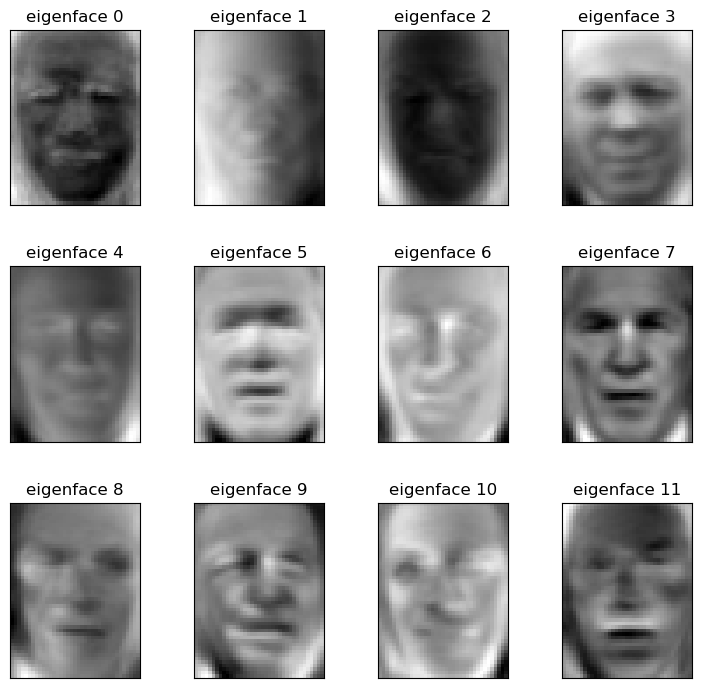

(966,)


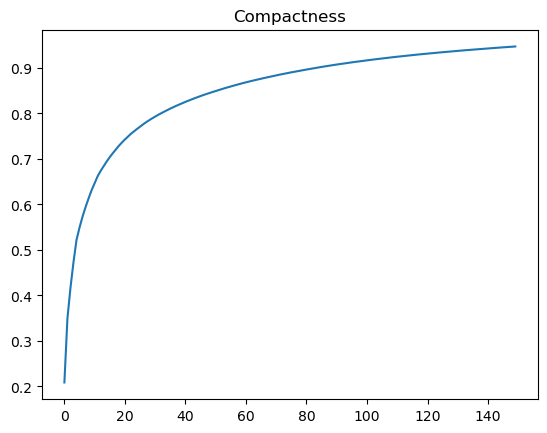

Total Testing 322
Predictions [3 3 6 3 3 3 3 1 3 3 3 3 3 3 3 3 6 3 3 4 1 1 3 3 1 1 2 3 3 3 3 3 3 3 3 3 3
 3 3 1 3 1 3 1 1 3 3 3 3 3 3 3 3 3 1 2 1 3 5 3 6 1 3 4 3 5 3 4 3 3 1 4 3 3
 3 2 3 6 3 3 6 3 3 3 3 3 3 3 3 3 5 6 3 3 1 3 1 1 3 6 3 3 3 3 3 3 3 3 3 1 3
 3 6 3 3 3 1 4 1 3 1 3 3 1 3 4 5 3 1 3 6 6 6 3 3 4 3 3 1 3 3 3 3 1 3 3 1 3
 3 1 1 3 1 3 3 3 6 1 3 3 6 5 5 1 3 3 5 1 3 3 3 3 3 1 5 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 2 4 3 2 3 6 3 3 3 3 3 3 3 3 3 5 1 4 2 6 3 3 5 3 3 4 3 3 1 3 3 3 3
 3 1 1 3 3 3 1 3 3 3 3 3 3 1 1 3 3 3 3 4 3 3 3 3 3 3 3 4 4 4 3 4 3 4 3 1 3
 3 3 3 3 1 3 5 6 1 6 1 6 3 3 3 6 3 3 3 3 3 1 1 3 3 3 3 3 3 3 4 3 3 5 3 3 3
 4 6 3 3 3 6 3 3 1 3 3 3 1 3 3 3 1 3 1 3 3 3 3 3 5 3]
Which Correct: [ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True False  True  True  True  True False  True False
 False  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False  True
 False  T

C:\Users\macke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\macke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\macke\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
# Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]
# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
# Split into a training set and a test set using a stratified k fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150
# Center data
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
#Eigen-decomposition
U, S, V = np.linalg.svd(X_train, full_matrices=False)
components = V[:n_components]
eigenfaces = components.reshape((n_components, h, w))
#project into PCA subspace
X_transformed = np.dot(X_train, components.T)
print(X_transformed.shape)
X_test_transformed = np.dot(X_test, components.T)
print(X_test_transformed.shape)
import matplotlib.pyplot as plt
# Qualitative evaluation of the predictions using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio)
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#build random forest
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150)
estimator.fit(X_transformed, y_train) #expects X as [n_samples, n_features]
predictions = estimator.predict(X_test_transformed)
correct = predictions==y_test
total_test = len(X_test_transformed)
#print("Gnd Truth:", y_test)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:",correct)
print("Total Correct:",np.sum(correct))
print("Accuracy:",np.sum(correct)/total_test)
print(classification_report(y_test, predictions, target_names=target_names))

Part 1.2 use torch/tf to perform the same task as above but with GPU scalability

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7
(966, 200)
(322, 200)


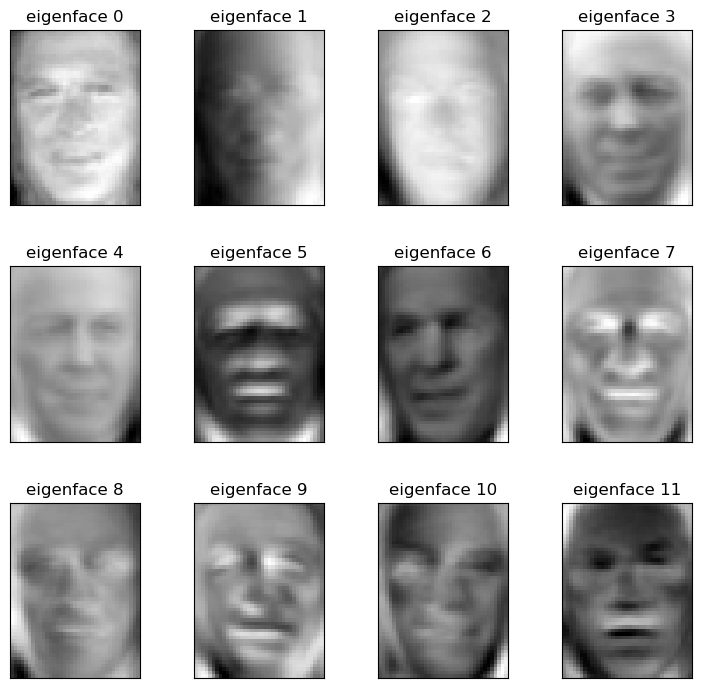

(966,)


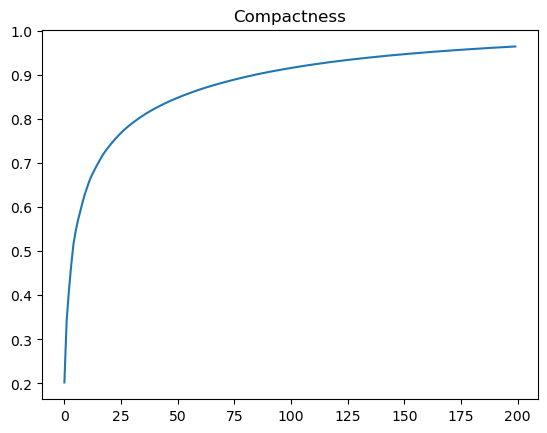

Total Testing 322
Predictions [3 1 3 3 3 3 3 3 3 1 3 0 3 3 3 3 3 3 3 3 3 4 3 3 3 3 1 3 3 3 1 3 2 3 3 3 3
 1 1 3 3 1 3 3 5 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 2 1 3 3 3 6 3 1 3 1 2
 3 3 3 3 3 3 3 3 3 3 1 4 3 1 5 3 3 2 3 3 3 4 3 3 3 3 1 3 5 3 3 3 3 3 3 3 1
 5 3 3 3 3 3 3 3 3 2 1 4 3 3 3 3 3 3 3 3 6 3 2 6 3 3 4 3 1 3 3 3 3 6 2 3 3
 6 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 1 3 3 3 1 3 3 3
 3 3 3 5 6 3 3 3 2 3 3 3 4 3 5 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 4 3 3 3 3 6 1
 3 3 3 3 6 3 1 3 3 3 5 3 3 1 3 3 3 3 3 3 3 1 3 3 6 3 4 3 3 5 4 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 6 3 1 1 3 3 3 3 3 3 1 3 3 3 5 3 3
 3 1 3 3 3 3 3 3 3 6 2 3 3 3 3 3 3 3 3 3 1 3 3 3 6 3]
Which Correct: [False  True  True  True False  True  True  True  True  True  True  True
 False False  True  True  True False False  True  True  True False False
  True False  True  True  True False  True  True  True False False False
 False  True  True  True False  True False False  True False False False
  True  T

In [3]:
import torch
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Extract relevant data
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
n_samples, h, w = lfw_people.images.shape

# Print dataset details
print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % X.shape[1])
print("n_classes: %d" % n_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)

# Center data (mean normalization)
mean = torch.mean(X_train_torch, axis=0)
X_train_torch -= mean
X_test_torch -= mean

# Compute SVD using PyTorch
U, S, V = torch.svd(X_train_torch)

# Select the top n_components eigenfaces
n_components = 200  # Increased from 150 to 200 to capture more variance
components = V[:, :n_components]
eigenfaces = components.T.reshape(n_components, h, w)

# Project training and test data into PCA subspace
X_train_pca = torch.mm(X_train_torch, components)
X_test_pca = torch.mm(X_test_torch, components)

# Convert tensors back to numpy arrays for compatibility
X_train_pca_np = X_train_pca.detach().numpy()
X_test_pca_np = X_test_pca.detach().numpy()

# Print the shape of transformed data
print(X_train_pca_np.shape)
print(X_test_pca_np.shape)

# Qualitative evaluation of the eigenfaces
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces.detach().numpy(), eigenface_titles, h, w)
plt.show()

# Plot the compactness curve
explained_variance = (S ** 2) / (n_samples - 1)
total_var = explained_variance.sum()
explained_variance_ratio = explained_variance / total_var
ratio_cumsum = np.cumsum(explained_variance_ratio.numpy())
print(ratio_cumsum.shape)
eigenvalueCount = np.arange(n_components)
plt.plot(eigenvalueCount, ratio_cumsum[:n_components])
plt.title('Compactness')
plt.show()

# Train a Random Forest Classifier with class weight balancing
estimator = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=150, random_state=42, class_weight='balanced')
estimator.fit(X_train_pca_np, y_train)

# Predict and evaluate
predictions = estimator.predict(X_test_pca_np)

# Calculate additional measures
correct = predictions == y_test
total_test = len(X_test_pca_np)
print("Total Testing", total_test)
print("Predictions", predictions)
print("Which Correct:", correct)
print("Total Correct:", np.sum(correct))
print("Accuracy:", np.sum(correct) / total_test)

# Show classification report
print(classification_report(y_test, predictions, target_names=target_names, zero_division=0))


Part 2.1 CNN Classifiers

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load LFW dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images  # Images are already scaled between 0 and 1
Y = lfw_people.target

# Verify the value range of X_train
print("X_min:", X.min(), "X_max:", X.max())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Reshape to add channel dimension (1 channel for grayscale)
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]
print("X_train shape:", X_train.shape)  # Should be (n_samples, 1, height, width)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for training and testing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 1 input channel, 32 output channels
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 25 * 18, 128)  # Correct input size
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the feature map
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, loss function, and optimizer
num_classes = len(lfw_people.target_names)
model = SimpleCNN(num_classes)
criterion = nn.CrossEntropyLoss()  # Sparse categorical cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the CNN Model
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Evaluate the Model
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Print Classification Report
print(classification_report(y_true, y_pred, target_names=lfw_people.target_names))



X_min: 0.0 X_max: 1.0
X_train shape: (966, 1, 50, 37)
Epoch [1/10], Loss: 1.7691
Epoch [2/10], Loss: 1.6597
Epoch [3/10], Loss: 1.5104
Epoch [4/10], Loss: 1.1876
Epoch [5/10], Loss: 0.8334
Epoch [6/10], Loss: 0.6288
Epoch [7/10], Loss: 0.4653
Epoch [8/10], Loss: 0.3911
Epoch [9/10], Loss: 0.2532
Epoch [10/10], Loss: 0.2181
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.69      0.64        13
     Colin Powell       0.90      0.93      0.92        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.91      0.95      0.93       146
Gerhard Schroeder       0.52      0.88      0.66        25
      Hugo Chavez       0.91      0.67      0.77        15
       Tony Blair       1.00      0.44      0.62        36

         accuracy                           0.84       322
        macro avg       0.80      0.75      0.75       322
     weighted avg       0.86      0.84      0.83       322

